In [67]:
import numpy as np
import sncosmo
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

import os
import opsimsummary as oss
import healpy as hp
from opsimsummary import SynOpSim
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import pickle
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

In [2]:
# Convert from flux to magnitude

def mag(flux):
    return -2.5 * np.log10(flux / 1256598)

In [51]:
lc2 = pd.read_csv('../data/ZTF22aaylnhq_ZTF.csv')
lc = pd.read_csv('../data/ZTF2022qmx.csv')
lc2

,mjd,filter,flux,fluxerr,zp,magsys,lim_mag,stacked
0,59815.190509,sdssu,NaN,3.169786,23.9,ab,21.454622,0
1,59812.331663,sdssu,NaN,12.619147,23.9,ab,19.954622,0
2,59813.280702,sdssu,NaN,8.730317,23.9,ab,20.354622,0
3,59825.879379,sdssg,29.403566,3.114394,23.9,ab,21.473763,0
4,59827.888462,sdssg,29.160838,3.034968,23.9,ab,21.501812,0
...,...,...,...,...,...,...,...,...
423,59861.834464,sdssz,40.204302,5.097052,23.9,ab,20.938899,0
424,59861.847690,sdssz,33.712582,5.165116,23.9,ab,20.924497,0
425,59871.823675,sdssz,27.037684,3.594215,23.9,ab,21.318187,0
426,59879.832515,sdssz,20.209941,6.919475,23.9,ab,20.607014,0


In [52]:
ztfr = lc[(lc['filter'] == 'ztfr') & (np.isfinite(lc['mag']))]
ztfg = lc[(lc['filter'] == 'ztfg') & (np.isfinite(lc['mag']))]

ztfr2 = lc2[(lc2['filter'] == 'ztfr') & (np.isfinite(lc2['flux']))]
ztfg2 = lc2[(lc2['filter'] == 'ztfg') & (np.isfinite(lc2['flux']))]
ztfr2

,mjd,filter,flux,fluxerr,zp,magsys,lim_mag,stacked
199,59816.175243,ztfr,111.255051,8.666271,23.9,ab,20.362616,0
200,59816.175243,ztfr,111.255441,8.666280,23.9,ab,20.362615,0
201,59816.175243,ztfr,111.255417,8.666278,23.9,ab,20.362615,0
203,59817.197974,ztfr,107.330780,7.559863,23.9,ab,20.510912,0
204,59829.151771,ztfr,75.364116,11.215698,23.9,ab,20.082631,0
...,...,...,...,...,...,...,...,...
309,59808.223333,ztfr,119.857106,12.461052,23.9,ab,19.968310,0
310,59807.279329,ztfr,126.333878,11.122526,23.9,ab,20.091688,0
311,59806.192523,ztfr,128.826766,8.716795,23.9,ab,20.356305,0
313,59807.279329,ztfr,126.332132,11.122357,23.9,ab,20.091705,0


In [53]:
magr2 = -2.5 * np.log10(ztfr2['flux'] / 10**9.5)
magr2

199    18.634201
200    18.634197
201    18.634197
203    18.673189
204    19.057088
         ...    
309    18.553341
310    18.496200
311    18.474985
313    18.496215
314    18.640865
Name: flux, Length: 71, dtype: float64

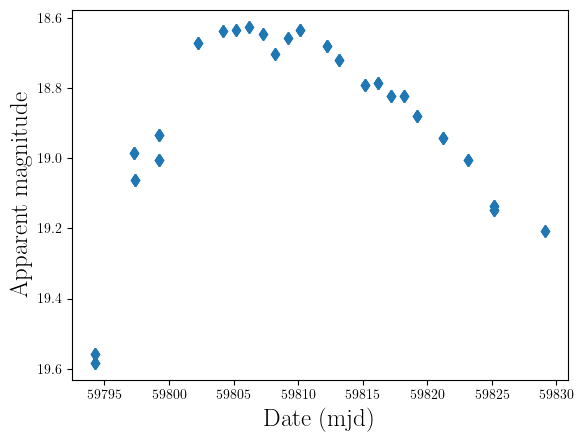

In [83]:
plt.figure(0)
#plt.errorbar(x=ztfg['mjd'], y=ztfg['mag'], yerr=ztfg['magerr'], lw=0, elinewidth=2, label="ztf g")
#plt.errorbar(x=ztfr['mjd'], y=ztfr['mag'], yerr=ztfr['magerr'], lw=0, elinewidth=2, label="ztf r")
plt.plot(ztfr['mjd'], ztfr['mag'], 'd', label="ztf r")
plt.plot(mjd, new_mags_r, 'd', color='C1')
#plt.legend(fontsize=16)
plt.gca().invert_yaxis()
plt.xlabel("Date (mjd)", fontsize=18)
plt.ylabel("Apparent magnitude", fontsize=18)
plt.show()

In [69]:
myopsimv3 = '../data/OpSim_databases/baseline_v3.0_10yrs.db'

In [70]:
synopsim = SynOpSim.fromOpSimDB(myopsimv3, opsimversion='fbsv2', usePointingTree=True, use_proposal_table=False,
                               subset='unique_all')

 reading from database sqlite:///../data/OpSim_databases/baseline_v3.0_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


In [72]:
def flux(mag, zero_point):
    return 10**((zero_point - mag)/2.5)

def radians(degrees):
    return degrees / 180 * np.pi

ra, dec:  [-145.78849904] [-44.84094392]


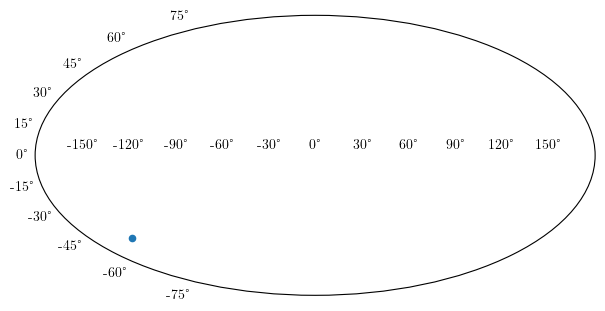

In [214]:
# Sample random points on a sphere
N = 1
ra_points = np.random.uniform(low=-180, high=180, size=N)
dec_points = np.arcsin(2 * np.random.uniform(size=N) - 1) / np.pi * 180

dec_selection = (dec_points > -90) & (dec_points < 40)
ra_points = ra_points[dec_selection]
dec_points = dec_points[dec_selection]

print("ra, dec: ", ra_points, dec_points)

gen = synopsim.pointingsEnclosing(ra_points, dec_points, circRadius=0., pointingRadius=1.75, 
                                  usePointingTree=True)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(221, projection="mollweide")
im1 = ax1.scatter(radians(ra_points), radians(dec_points), s=20, label="Excluded")


In [215]:
cadence = next(gen)

check using ptree True


In [216]:
mjd = cadence['expMJD'][cadence['filter'] == 'r']



In [78]:
mjd

obsHistID
1223572    62376.139728
834634     61669.052268
834684     61669.076261
406257     60951.014877
406307     60951.037807
               ...     
1208693    62343.159653
309559     60763.387523
716430     61473.399694
397009     60936.000126
397059     60936.024757
Name: expMJD, Length: 814, dtype: float64

In [217]:
def light_curve(z_source):
    """
    Samples light curve parameters from stretch and colour distributions based on Scolnic & Kessler (2016)
    and returns a type Ia SN light curve model from SNcosmo.

    :param z_source: redshift of the supernova
    :return: SNcosmo model of the supernova light curve, stretch parameter, colour parameter, MW dust contribution,
             observed absolute magnitude
    """
    H_0 = 70
    model = sncosmo.Model(source='salt3')
    x1 = 0                               
    c = 0
    M_observed = -19.3

    model.set(z=z_source, t0=59805, x1=x1, c=c)
    cosmo = FlatLambdaCDM(H0=H_0, Om0=0.3, Ob0=0.05)
    model.set_source_peakabsmag(M_observed, 'bessellb', 'ab', cosmo=cosmo)
    x0 = model.get('x0')
    model.set(x0=x0)
    
    return model

z_source = 0.35
model = light_curve(z_source)
times = mjd - mjd.iloc[0] + ztfr['mjd'].iloc[0]
mags_r = model.bandmag('ztfr', time=times, magsys='ab')

mu = 19
new_mags_r = mags_r - 2.5 * np.log10(mu)


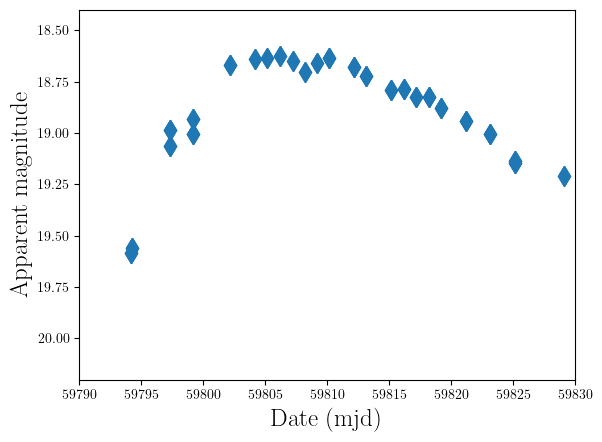

In [229]:
plt.figure(0)
#plt.errorbar(x=ztfg['mjd'], y=ztfg['mag'], yerr=ztfg['magerr'], lw=0, elinewidth=2, label="ztf g")
#plt.errorbar(x=ztfr['mjd'], y=ztfr['mag'], yerr=ztfr['magerr'], lw=0, elinewidth=2, label="ztf r")
plt.plot(ztfr['mjd'], ztfr['mag'], 'd', label="ztf r", ms=10)
#plt.plot(times + 3.5, new_mags_r, 'd', color='C1')
#plt.legend(fontsize=16)
plt.gca().invert_yaxis()
plt.xlabel("Date (mjd)", fontsize=18)
plt.ylabel("Apparent magnitude", fontsize=18)
plt.xlim(59790, 59830)
plt.ylim(20.2, 18.4)
#plt.savefig("../results/figures/LC_cadence_ZTF.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')
plt.show()

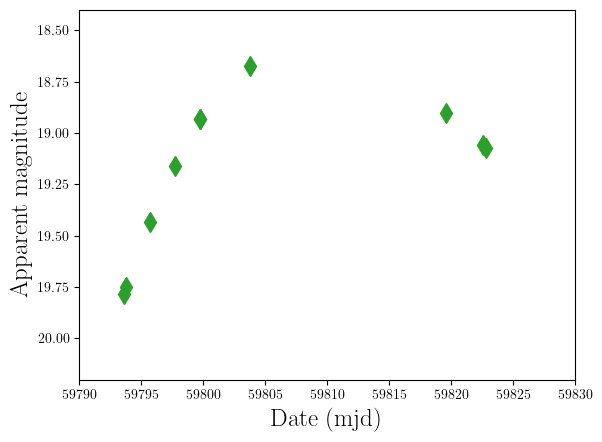

In [230]:
plt.figure(0)
#plt.errorbar(x=ztfg['mjd'], y=ztfg['mag'], yerr=ztfg['magerr'], lw=0, elinewidth=2, label="ztf g")
#plt.errorbar(x=ztfr['mjd'], y=ztfr['mag'], yerr=ztfr['magerr'], lw=0, elinewidth=2, label="ztf r")
#plt.plot(ztfr['mjd'], ztfr['mag'], 'd', label="ztf r")
plt.plot(times + 3.5, new_mags_r, 'd', color='C2', ms=10)
#plt.legend(fontsize=16)
plt.gca().invert_yaxis()
plt.xlabel("Date (mjd)", fontsize=18)
plt.ylabel("Apparent magnitude", fontsize=18)
plt.xlim(59790, 59830)
plt.ylim(20.2, 18.4)
#plt.savefig("../results/figures/LC_cadence_LSST.png", transparent=False, facecolor='white', dpi=250, bbox_inches='tight')
plt.show()

##### print(np.diff(np.sort(times))[:10])
print(np.diff(ztfr['mjd']))

In [132]:
np.sort(times[np.isfinite(mags_r)])

array([59791.15789632, 59794.2325347 , 59800.13726882, 59800.13820645,
       59800.16127979, 59800.16223382, 59800.20900587, 59800.2134932 ,
       59800.22026836, 59800.22475157, 59801.15385503, 59801.17824987,
       59810.10219836, 59823.16777597, 59823.19175953, 59830.07259641,
       59830.09635782, 59832.08578976, 59834.14394133, 59838.13406454,
       59841.97602359, 59841.99860254, 59849.95654212, 59849.97901494,
       59855.07143183, 59855.09524965, 59856.09665301, 59856.12064099,
       59867.88530056, 59867.90852538, 59868.01301576, 59868.03673688,
       59868.06108889, 59869.03641324, 59869.05921317, 59869.92714006,
       59869.95099745, 59871.00736235])

In [231]:
np.around(np.diff(np.sort(times[np.isfinite(mags_r)])))

array([ 0.,  2.,  2.,  2.,  0.,  4., 16.,  3.,  0.,  8.,  0., 23.,  0.,
        7.,  0.])

In [139]:
np.median(np.diff(np.sort(times))[np.diff(np.sort(times)) >= 1])

3.0857938576154993

In [140]:
np.median(np.diff(np.sort(times[np.isfinite(mags_r)])))

0.04677204730978701

In [212]:
np.mean([ 2.,  2.,  0.,  7., 13., 11., 15.,  5., 33.])

9.777777777777779